# In the name of GOD

Assignment 1 - Afsaneh Sarboland

# Starting

At the begining we import the data and libraries is going to be used.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

Then we read the data that is imported...

In [36]:
sales = pd.read_csv('D:\MS. AI\Books\Machine Learning\data\kc_house_data.csv', dtype=dtype_dict)
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In this cell we choose the feature is gonna be used for xi, xi is independent variable and the sqft_l column of our data is xi which was chose, yi is depended variable and the price column of our data is yi which was chose.
After we chose the xi and yi, we defined the model for residual sum squares, model1 was assumed for w0 and w1 with initial value for model2 is the same model1 but with different values.

In [37]:
yi=sales['price']
xi=sales['sqft_living']
def model (w0,w1):
    y_hat=w0+w1*xi
    RSS=sum((yi-y_hat)**2)
    return RSS
def model1 (xi):
    w0=-43867
    w1=280
    return w0+w1*xi
def model2 (xi):
    w0=299
    w1=299
    return w0+w1*xi

# Approuch 1

For predicting price of house we have 3 approuch, at first we consider approuch1 by w0 and w1 getting different values and then by using residual sum squares calculate all of them then we choose the minimum of RSS that were calculated.

In [38]:
best=model(-43867,280)
best1=model(299,299)
def approuch1():
    for w0 in range(0,10):
        for w1 in range (0,10):
            y_hat=w0+w1*xi
            #plt.plot(xi,y_hat)
            RSS=sum((yi-y_hat)**2)
            if RSS < best:
                best_w0=w0
                best_w1=w1
                return (best_w0,best_w1)
app1=approuch1()
print(app1)

None


# Approuch 2 - Simple Linear Regression

we're gonna calculate simple linear regression here, so for calculating simple linear regression we need to claculate some fundemental experessions such as sum of xi, sum of yi and stuff like that.
Then we definded these fundemental expressions we calculate simple linear regression

intercept: -43580.743094473844 slope: 280.6235678974482


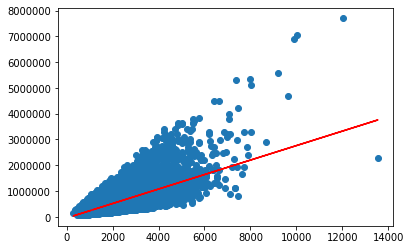

In [39]:
sxi= sum(xi)
syi=sum(yi)
sxiyi=sum(xi*yi)
sxi2=sum(xi**2)
def mean_xi(sxi):
    n=len(xi)
    mean=sxi/float(n)
    return mean
def mean_yi(syi):
    n=len(yi)
    mean=syi/float(n)
    return mean
n=len(xi)
mxi=mean_xi(sxi)
myi=mean_yi(syi)
def slope(sxiyi,sxi2,sxi,syi):
    w1=(((-1)*sxiyi)+(float(n)*mxi*myi))/((float(n)*(mxi**2))-sxi2)
    return w1
w1=slope(sxiyi,sxi2,sxi,syi)
z=w1*mxi
def intercept(myi,z):
    w0=myi-(w1*mxi)
    return w0
w0=intercept(myi,w1*mxi)
e=0
def simple_linear_regression (w0,w1):
    y_hat=w0+w1*xi
    e=yi-y_hat
    return y_hat+e
SLR=simple_linear_regression(w0,w1)
#print(SLR)
print('intercept:',w0,'slope:',w1)
plt.scatter(xi,yi)
y_hat=w0+w1*xi
plt.plot(xi,y_hat,c='red')
plt.show()

# Approuch 3 - Gradient Descent

And the final approuch is calculating simple linear regression by using hill climbing or gradient descent to get w0 and w1 or intercept and slope of line.
This approuch is better than when we take derivative of line and put them to equles 0, however both of them has advantages and disadvantages, ultimately according to calculating we get the point and the approuch 3 is highly recommended for calculating for intercept and slope of line because it has less erros or in other words the distance between the real price and predicted price less than we calculated in approuch 2,  we can conclude the approuch 3 is more accurate. 

nan nan


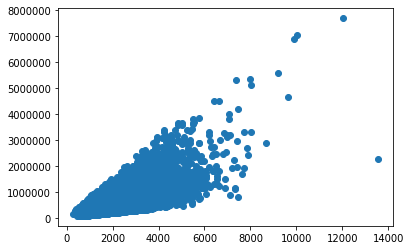

In [51]:
# Building the model
m =280.6235678974482 #slope
c = -43580.743094473844 #intercept

L = 0.0001  # The learning Rate
epochs = 21613  # The number of iterations to perform gradient descent

n = float(len(xi)) # Number of elements in X

# Performing Gradient Descent 
for i in range(1,epochs): 
    Y_pred = m*xi + c  # The current predicted value of Y
    D_m = (-2/n) * sum(xi * (yi - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(yi - Y_pred)  # Derivative wrt c
    #L=alpha/i
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m,c)

Y_pred = m*xi + c
 
plt.scatter(xi, yi) 
plt.plot([min(xi), max(xi)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()